In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
import rule_optimisation.optimisation_functions as opt_funcs

from rule_generation.rule_generator_dt import RuleGeneratorDT

def create_y(X):
    y = (X['A'] > 9)|(X['B'] > 0.98)|(X['C'] <= 0)|(X['D'] == 'CN')
    return y.astype(int)
        
X = pd.DataFrame({
    'A': np.random.randint(0, 10, 100000),
    'B': np.random.uniform(0, 1, 100000),
    'C': np.random.randint(-1, 20, 100000),
    'D': ['US', 'GB', 'FR', 'CN', 'missing'] * 20000}
)
y = create_y(X)

X_processed = pd.get_dummies(X)

X_processed.shape

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
import rule_optimisation.optimisation_functions as opt_funcs

In [4]:
from rule_generation.rule_generator_dt import RuleGeneratorDT

In [18]:
def create_y(X):
    y = (X['A'] > 9)|(X['B'] > 0.98)|(X['C'] <= 0)|(X['D'] == 'CN')
    return y.astype(int)
        
X = pd.DataFrame({
    'A': np.random.randint(0, 10, 100000),
    'B': np.random.uniform(0, 1, 100000),
    'C': np.random.randint(-1, 20, 100000),
    'D': ['US', 'GB', 'FR', 'CN', 'missing'] * 20000}
)
y = create_y(X)

In [5]:
X_processed = pd.get_dummies(X)

In [6]:
X_processed.shape

(100000, 8)

In [7]:
rg = RuleGeneratorDT(opt_func=precision_score, n_total_conditions=4, tree_ensemble=RandomForestClassifier(random_state=0), num_cores=1)

In [8]:
# rg.fit(X_processed[:1000], y[:1000])

In [9]:
# rg.rule_descriptions

In [5]:
import cProfile, pstats
# cProfile.run('rg.fit(X_processed, y)', sort='cumtime', filename='rule_gen_dt_profile_opt.dat')

# Old version

In [9]:
rg = RuleGeneratorDT(opt_func=precision_score, n_total_conditions=4, tree_ensemble=RandomForestClassifier(random_state=0), num_cores=1)
# cProfile.run('rg.fit(X_processed, y)', sort='cumtime', filename='rule_gen_dt_profile_opt.dat')

In [10]:
p = pstats.Stats('rule_gen_dt_profile.dat')
p.sort_stats('cumtime').print_stats()

Wed Dec 23 15:26:05 2020    rule_gen_dt_profile.dat

         5078777 function calls (4974993 primitive calls) in 28.159 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   28.199   28.199 {built-in method builtins.exec}
        1    0.075    0.075   28.171   28.171 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        2    0.001    0.000   26.061   13.030 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:946(__call__)
      202    0.003    0.000   26.060    0.129 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:784(dispatch_one_batch)
      200    0.001    0.000   26.043    0.130 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:747(_dispatch)
      200    0.001    0.000   26.041    0.130 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/_paralle

# New version

In [162]:
rg = RuleGeneratorDT(opt_func=precision_score, n_total_conditions=4, tree_ensemble=RandomForestClassifier(random_state=0), num_cores=1)
cProfile.run('rg.fit(X_processed, y)', sort='cumtime', filename='rule_gen_dt_profile_opt.dat')

In [11]:
p = pstats.Stats('rule_gen_dt_profile_opt.dat')
p.sort_stats('cumtime').print_stats()

Wed Dec 23 16:39:10 2020    rule_gen_dt_profile_opt.dat

         3043097 function calls (2968622 primitive calls) in 21.140 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   21.178   21.178 {built-in method builtins.exec}
        1    0.000    0.000   21.149   21.149 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        1    0.000    0.000   19.324   19.324 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:118(_extract_rules_from_ensemble)
        1    0.099    0.099   18.409   18.409 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_application/rule_application/argo_rule_applier.py:30(apply)
        1    0.062    0.062   16.695   16.695 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_application/rule_application/argo_rule_applier.py:58(_get_rule_description

# New version with Precision class instead of precision_score (which is much faster)

In [15]:
from rule_optimisation.optimisation_functions import Precision
precision = Precision()
rg = RuleGeneratorDT(opt_func=precision.fit, n_total_conditions=4, tree_ensemble=RandomForestClassifier(random_state=0), num_cores=1)
cProfile.run('rg.fit(X_processed, y)', sort='cumtime', filename='rule_gen_dt_profile_opt_new_prec_class.dat')

In [16]:
p = pstats.Stats('rule_gen_dt_profile_opt_new_prec_class.dat')
p.sort_stats('cumtime').print_stats()

Wed Jan  6 16:44:43 2021    rule_gen_dt_profile_opt_new_prec_class.dat

         2323161 function calls (2294976 primitive calls) in 7.290 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    7.332    7.332 {built-in method builtins.exec}
        1    0.000    0.000    7.302    7.302 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        1    0.000    0.000    4.629    4.629 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:117(_extract_rules_from_ensemble)
        2    0.001    0.000    3.629    1.815 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:946(__call__)
      202    0.004    0.000    3.628    0.018 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:784(dispatch_one_batch)
      200    0.001    0.000    3.608    0.018 /U

# Try newest version with larger dataset

In [73]:
np.random.seed(0)
X = pd.DataFrame({
    'A': np.random.randint(0, 10, 1000000),
    'B': np.random.uniform(0, 1, 1000000),
    'C': np.random.randint(-1, 20, 1000000),
    'D': ['US', 'GB', 'FR', 'CN', 'missing'] * 200000}
)
y = create_y(X)
X_processed = pd.get_dummies(X)

In [74]:
precision = Precision()
rg = RuleGeneratorDT(opt_func=precision.fit, n_total_conditions=4, tree_ensemble=RandomForestClassifier(random_state=0), num_cores=1)
cProfile.run('rg.fit(X_processed, y)', sort='cumtime', filename='rule_gen_dt_profile_opt_1m_records.dat')

In [75]:
p = pstats.Stats('rule_gen_dt_profile_opt_1m_records.dat')
p.sort_stats('cumtime').print_stats()

Thu Jan  7 12:48:57 2021    rule_gen_dt_profile_opt_1m_records.dat

         3617255 function calls (3572646 primitive calls) in 101.265 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001  101.501  101.501 {built-in method builtins.exec}
        1    0.002    0.002  101.280  101.280 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        1    0.000    0.000   56.777   56.777 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:117(_extract_rules_from_ensemble)
        2    0.001    0.000   50.945   25.472 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:946(__call__)
      202    0.004    0.000   50.943    0.252 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:784(dispatch_one_batch)
      200    0.001    0.000   50.922    0.255 /Use

# Try newest version with 10 estimators

In [76]:
precision = Precision()
rg = RuleGeneratorDT(opt_func=precision.fit, n_total_conditions=4, tree_ensemble=RandomForestClassifier(n_estimators=10, random_state=0), num_cores=1)
cProfile.run('rg.fit(X_processed, y)', sort='cumtime', filename='rule_gen_dt_profile_opt_1m_records_10_est.dat')

In [77]:
p = pstats.Stats('rule_gen_dt_profile_opt_1m_records_10_est.dat')
p.sort_stats('cumtime').print_stats()

Thu Jan  7 12:50:22 2021    rule_gen_dt_profile_opt_1m_records_10_est.dat

         443617 function calls (438242 primitive calls) in 8.114 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    8.144    8.144 {built-in method builtins.exec}
        1    0.000    0.000    8.117    8.117 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        2    0.000    0.000    4.745    2.372 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:946(__call__)
       22    0.001    0.000    4.744    0.216 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:784(dispatch_one_batch)
       20    0.000    0.000    4.742    0.237 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:747(_dispatch)
       20    0.000    0.000    4.742    0.237 /Users/jlaidler/venvs/argo/lib/python3.7/site-packa

# Try newest version with larger dataset (parallel)

In [64]:
precision = Precision()
rg = RuleGeneratorDT(opt_func=precision.fit, n_total_conditions=4, tree_ensemble=RandomForestClassifier(random_state=0), num_cores=6)
cProfile.run('rg.fit(X_processed, y)', sort='cumtime', filename='rule_gen_dt_profile_opt_1m_records_parallel.dat')

In [66]:
p = pstats.Stats('rule_gen_dt_profile_opt_1m_records_parallel.dat')
p.sort_stats('cumtime').print_stats()

Thu Jan  7 09:50:41 2021    rule_gen_dt_profile_opt_1m_records_parallel.dat

         3080495 function calls (3044981 primitive calls) in 108.930 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      4/1    0.001    0.000  109.283  109.283 {built-in method builtins.exec}
        1    0.015    0.015  108.948  108.948 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        1    0.003    0.003   62.354   62.354 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:117(_extract_rules_from_ensemble)
        2    0.001    0.000   55.287   27.643 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:946(__call__)
        1    1.463    1.463   53.100   53.100 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_application/rule_application/argo_rule_applier.py:30(apply)
        1    0.009    

# Test on Omnyex data

In [8]:
om = pd.read_pickle('~/Downloads/omnyex_processed_for_profiling.pkl')
X = om.drop('chargeback', axis=1)
y = om['chargeback']

# Original

## 1m records

In [17]:
X_subset = X[:1000000]
y_subset = y[:1000000]

In [15]:
filename = 'rule_gen_dt_profile_orig_omnyex_1m_records'
precision = opt_funcs.Precision()
rg = RuleGeneratorDT(opt_func=precision.fit, n_total_conditions=4, tree_ensemble=RandomForestClassifier(n_estimators=20, random_state=0), num_cores=1)
cProfile.run('rg.fit(X_subset, y_subset)', sort='cumtime', filename=f'{filename}.dat')

In [16]:
p = pstats.Stats(f'{filename}.dat')
p.sort_stats('cumtime').print_stats()

Fri Jan  8 09:19:20 2021    rule_gen_dt_profile_orig_omnyex_1m_records.dat

         1223235 function calls (1209881 primitive calls) in 28.925 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   29.020   29.020 {built-in method builtins.exec}
        1    0.000    0.000   28.933   28.933 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        1    0.000    0.000   18.777   18.777 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:117(_extract_rules_from_ensemble)
        2    0.000    0.000   18.083    9.041 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:946(__call__)
       42    0.001    0.000   18.082    0.431 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:784(dispatch_one_batch)
       40    0.000    0.000   18.078    0.4

## All records

In [18]:
X_subset = X
y_subset = y

In [19]:
filename = 'rule_gen_dt_profile_orig_omnyex_all_records'
precision = opt_funcs.Precision()
rg = RuleGeneratorDT(opt_func=precision.fit, n_total_conditions=4, tree_ensemble=RandomForestClassifier(n_estimators=20, random_state=0), num_cores=1)
cProfile.run('rg.fit(X_subset, y_subset)', sort='cumtime', filename=f'{filename}.dat')

In [21]:
p = pstats.Stats(f'{filename}.dat')
p.sort_stats('cumtime').print_stats()

Fri Jan  8 14:21:20 2021    rule_gen_dt_profile_orig_omnyex_all_records.dat

         683871 function calls (676282 primitive calls) in 47.475 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   47.479   47.479 {built-in method builtins.exec}
        1    0.064    0.064   47.479   47.479 <string>:1(<module>)
        1    0.003    0.003   47.415   47.415 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_generation/rule_generation/rule_generator_dt.py:54(fit)
        2    0.002    0.001   34.567   17.284 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:946(__call__)
       42    0.002    0.000   34.564    0.823 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:784(dispatch_one_batch)
       40    0.000    0.000   34.556    0.864 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/joblib/parallel.py:747(_dispatch)
       40    0.000    0.000

# Unit testing

In [141]:
import random

In [166]:
def return_random_num(y, fraud_min, fraud_max, nonfraud_min, nonfraud_max, rand_func):
    data = [rand_func(fraud_min, fraud_max) if i == 1 else rand_func(
        nonfraud_min, nonfraud_max) for i in y]
    return data

random.seed(0)
np.random.seed(0)
y = pd.Series(data=[0]*980 + [1]*20, index=list(range(0, 1000)))
X = pd.DataFrame(data={
    "num_distinct_txn_per_email_1day": [round(max(i, 0)) for i in return_random_num(y, 2, 1, 1, 2, np.random.normal)],
    "num_distinct_txn_per_email_7day": [round(max(i, 0)) for i in return_random_num(y, 4, 2, 2, 3, np.random.normal)],
    "ip_country_us": [round(min(i, 1)) for i in [max(i, 0) for i in return_random_num(y, 0.3, 0.4, 0.5, 0.5, np.random.normal)]],
    "email_kb_distance": [min(i, 1) for i in [max(i, 0) for i in return_random_num(y, 0.2, 0.5, 0.6, 0.4, np.random.normal)]],
    "email_alpharatio":  [min(i, 1) for i in [max(i, 0) for i in return_random_num(y, 0.33, 0.1, 0.5, 0.2, np.random.normal)]],
},
    index=list(range(0, 1000))
)
columns_int = [
    'num_distinct_txn_per_email_1day', 'num_distinct_txn_per_email_7day', 'ip_country_us']
columns_cat = ['ip_country_us']
columns_num = ['num_distinct_txn_per_email_1day',
               'num_distinct_txn_per_email_7day', 'email_kb_distance', 'email_alpharatio']
weights = y.apply(lambda x: 1000 if x == 1 else 1)

In [167]:
from rule_optimisation.optimisation_functions import FScore
f0dot5 = FScore(0.5)

In [178]:
rg = RuleGeneratorDT(opt_func=f0dot5.fit, n_total_conditions=4, tree_ensemble=RandomForestClassifier(random_state=0), num_cores=1)

In [188]:
dt = DecisionTreeClassifier(random_state=0, max_depth=4)
dt.fit(X, y, sample_weight=None)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [189]:
import argo_utils.argo_utils as argo_utils
columns_int, columns_cat, _ = argo_utils.return_columns_types(X)

In [192]:
rule_sets = rg._drop_low_prec_trees_return_rules(X=X,y=y,decision_tree=dt, sample_weight=None, columns_int=columns_int, columns_cat=columns_cat)

In [193]:
rule_sets

{"(X['email_alpharatio']<=0.43817)&(X['email_kb_distance']>0.00092)&(X['num_distinct_txn_per_email_1day']<=1)",
 "(X['email_alpharatio']<=0.43817)&(X['email_kb_distance']>0.00092)&(X['num_distinct_txn_per_email_1day']>=2)",
 "(X['email_alpharatio']<=0.43844)&(X['email_alpharatio']>0.43817)&(X['email_kb_distance']>0.00092)",
 "(X['email_alpharatio']<=0.52347)&(X['email_kb_distance']<=0.00092)&(X['num_distinct_txn_per_email_1day']<=2)&(X['num_distinct_txn_per_email_1day']>=2)",
 "(X['email_alpharatio']<=0.52347)&(X['email_kb_distance']<=0.00092)&(X['num_distinct_txn_per_email_1day']>=3)",
 "(X['email_alpharatio']>0.43844)&(X['email_kb_distance']<=0.29061)&(X['email_kb_distance']>0.00092)&(X['num_distinct_txn_per_email_7day']>=5)"}

In [186]:
expected_rule_sets_sample_weight_None = set([
        "(X['email_alpharatio']<=0.43817)&(X['email_kb_distance']>0.00092)&(X['num_distinct_txn_per_email_1day']<=1)",
        "(X['email_alpharatio']<=0.43817)&(X['email_kb_distance']>0.00092)&(X['num_distinct_txn_per_email_1day']>=2)",
        "(X['email_alpharatio']<=0.43844)&(X['email_alpharatio']>0.43817)&(X['email_kb_distance']>0.00092)",
        "(X['email_alpharatio']<=0.52347)&(X['email_kb_distance']<=0.00092)&(X['num_distinct_txn_per_email_1day']<=2)&(X['num_distinct_txn_per_email_1day']>=2)",
        "(X['email_alpharatio']<=0.52347)&(X['email_kb_distance']<=0.00092)&(X['num_distinct_txn_per_email_1day']>=3)",
        "(X['email_alpharatio']>0.43844)&(X['email_kb_distance']<=0.29061)&(X['email_kb_distance']>0.00092)&(X['num_distinct_txn_per_email_7day']>=5)"
    ])

In [194]:
expected_rule_sets_sample_weight_None == rule_sets

True

In [146]:
rg.rule_descriptions

,Logic,Precision,Recall,nConditions,PercDataFlagged,OptMetric
Rule,,,,,,
RGDT_Rule452,(X['email_alpharatio']<=0.37224)&(X['email_alp...,0.714286,0.25,4,0.007,0.520833
RGDT_Rule56,(X['email_alpharatio']<=0.5251)&(X['email_kb_d...,0.545455,0.30,4,0.011,0.468750
RGDT_Rule266,(X['email_alpharatio']<=0.5251)&(X['email_kb_d...,0.545455,0.30,4,0.011,0.468750
RGDT_Rule233,(X['email_alpharatio']<=0.35805)&(X['email_alp...,0.666667,0.20,4,0.006,0.454545
RGDT_Rule35,(X['email_alpharatio']<=0.37273)&(X['email_kb_...,0.666667,0.20,4,0.006,0.454545
...,...,...,...,...,...,...
RGDT_Rule26,(X['email_alpharatio']>0.43844)&(X['email_kb_d...,0.009174,0.05,3,0.109,0.010965
RGDT_Rule21,(X['email_alpharatio']>0.37356)&(X['email_kb_d...,0.008621,0.15,3,0.348,0.010623
RGDT_Rule24,(X['email_alpharatio']<=0.45402)&(X['email_alp...,0.008772,0.05,4,0.114,0.010504


# Looking at trees

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt = DecisionTreeClassifier(random_state=0, max_depth=1)

In [99]:
dt.fit(X_processed, y)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [100]:
dt.tree_.n_node_samples

array([100000,  80000,  20000])

In [101]:
dt.tree_.value

array([[[70926., 29074.]],

       [[70926.,  9074.]],

       [[    0., 20000.]]])

In [102]:
leaf_node_results = dt.tree_.value[dt.tree_.children_left == -1]

In [103]:
leaf_node_results

array([[[70926.,  9074.]],

       [[    0., 20000.]]])

In [110]:
9074/(9074+70926)

0.113425

In [104]:
tp_fp = np.sum(leaf_node_results, axis=0)[0]

In [105]:
np.sum(tp_fp)

100000.0

In [106]:
tp_fp[0]

70926.0

In [107]:
dt.tree_.impurity[dt.tree_.children_left == -1]

array([0.20111954, 0.        ])

In [108]:
from sklearn.tree import plot_tree

[Text(167.4, 163.07999999999998, 'X[3] <= 0.5\ngini = 0.412\nsamples = 100000\nvalue = [70926, 29074]'),
 Text(83.7, 54.360000000000014, 'gini = 0.201\nsamples = 80000\nvalue = [70926, 9074]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 20000\nvalue = [0, 20000]')]

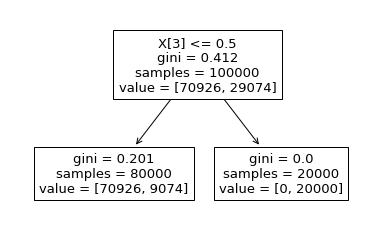

In [109]:
plot_tree(dt)

In [114]:
((70926+9074)/(100000))

0.8

In [89]:
dt_preds = dt.predict(X_processed)

In [91]:
precision_score(y_true=y, y_pred=dt_preds)

1.0

In [116]:
test_set =set()

In [117]:
test_set.add(1)

In [119]:
test_set.add(1)

In [122]:
test_set
test_set_2 = set([2])

In [123]:
test_set

{1}

In [124]:
test_set_2

{2}

In [125]:
test_set |= test_set_2

In [128]:
test_set_2

{2}

In [129]:
test_sets = [set([1,2]), set([3,4]), set([1,2])]

In [130]:
set().union(*test_sets)

{1, 2, 3, 4}

In [131]:
set()

set()

In [60]:
from rule_optimisation.optimisation_functions import Precision, Recall
from sklearn.metrics import precision_score, recall_score
import numpy as np

In [61]:
p = Precision()

In [62]:
p.fit(np.array([1,0]), np.array([0,0]))

0.0

In [40]:
r = Recall()

In [57]:
r.fit(np.array([0,0]), np.array([1,0]))

0.0

In [42]:
y_pred = np.random.randint(0, 2, 10000000)
y_true = np.random.randint(0, 2, 10000000)

In [56]:
%timeit p.fit(y_true, y_pred)

43.7 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
%timeit precision_score(y_true, y_pred)

KeyboardInterrupt: 

In [34]:
4880/43.2

112.96296296296296